In [136]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from PIL import Image

In [137]:
# Load dataset
data = loadmat("digits.mat")
features = data["digits"]
labels = data["labels"]

In [138]:
# Shuffle data
random.seed(10)
combined = list(zip(features, labels))
random.shuffle(combined)
features[:], labels[:] = zip(*combined)

In [139]:
# Split data between train and test
train_X = features[:2500]
train_Y = labels[:2500]
test_X = features[2500:]
test_Y = labels[2500:]

In [140]:
# Apply PCA
pca = PCA(n_components=400)
#principal_components = pca.fit_transform(train_X)
pca.fit_transform(train_X)
eigen_values = pca.explained_variance_
principal_components = pca.components_
pves = pca.explained_variance_ratio_

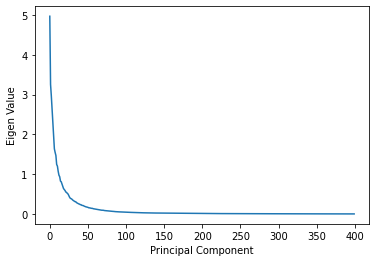

In [141]:
plt.plot(eigen_values)
plt.xlabel("Principal Component")
plt.ylabel("Eigen Value")
plt.show()

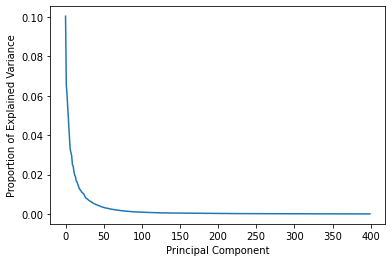

In [142]:
plt.plot(pve)
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Explained Variance")
plt.show()

In [143]:
# Find the mean of data 
train_X_mean = (pca.mean_.reshape(20,20)).T

(-0.5, 19.5, 19.5, -0.5)

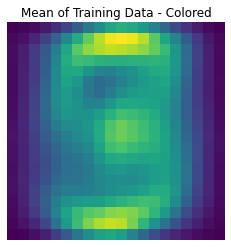

In [144]:
# Display mean of data as colored
plt.imshow(train_X_mean)
plt.title("Mean of Training Data - Colored")
plt.axis("off")

(-0.5, 19.5, 19.5, -0.5)

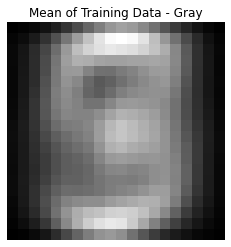

In [145]:
# Display mean of data as gray
plt.imshow(train_X_mean, cmap="gray")
plt.title("Mean of Training Data - Gray")
plt.axis("off")

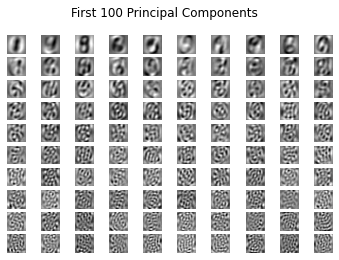

In [146]:
# Display eigenvectors - first 100
first_100_pc = plt.figure()
first_100_pc.suptitle("First 100 Principal Components")
for index in range(100):
    pc = (principal_components[index]).reshape(20, 20)
    first_100_pc.add_subplot(10, 10, index + 1)
    plt.imshow(pc.T, cmap="gray") # show the image as black & white
    plt.axis('off') # turn off axis ticks
plt.show(block=True)